In [2]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt
import ROOT
import root_numpy
import glob



print 'ok'

Welcome to ROOTaaS 6.06/00
ok


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def integr(x,z): #for normalization of results
    integr=0
    for item in z:
        integr+=item*(x[10]-x[9])
    return integr    
 
#convolve with shifted dirac function
def move(distrib,steps, x, factor):
    l=[]
    l.append(distrib)
    incr_sigma=sigma
    mu=x[np.argmax(distrib)]
    incr_mu=(-factor/2)*mu
    
    for i in range(steps):
        step = factor/steps
        
        incr_mu += step*mu
        incr_sigma = 0.001 #approx a shifted dirac delta
        
        y=1/(incr_sigma*(2*np.pi)**0.5)    *  np.exp(-(x-incr_mu)**2/(2*incr_sigma**2))
        z = np.convolve(distrib,y, mode="same")
        z/=integr(x,z)
        l.append(z)    
    return l    



#convolve with gaussians
def enlarge(distrib,steps, x,sigma,factor):
    l=[]
    l.append(distrib)
    incr_sigma=0
    incr_mu=0
    for i in range(steps):
        step = (i+1)*factor/steps
        incr_sigma = sigma*((1+step)**2-1)**0.5   #increase the sigma in steps until desidered factor
        y=1/(incr_sigma*(2*np.pi)**0.5)    *  np.exp(-(x-incr_mu)**2/(2*incr_sigma**2))
        z = np.convolve(distrib,y, mode="same")
        z/=integr(x,z)
        l.append(z)    
    return l


# multiply with gaussian == convolve in coniugate space
def sharpen(distrib,steps,x,sigma,factor):
    l=[]
    l.append(distrib)
    incr_sigma=0
    incr_mu=0
    for i in range(steps):
        step = (i+1)*factor/steps
        incr_mu= x[np.argmax(distrib)]
        incr_sigma = sigma*((1-step)**2/(1-(1-step)**2))**0.5
        
        y=1/(incr_sigma*(2*np.pi)**0.5)    *  np.exp(-(x-incr_mu)**2/(2*incr_sigma**2))
        z=y*distrib
        
        z/=integr(x,z)   
        l.append(z)    
    return l    
            
    
    

[0.6, 1.5, 0, 6]

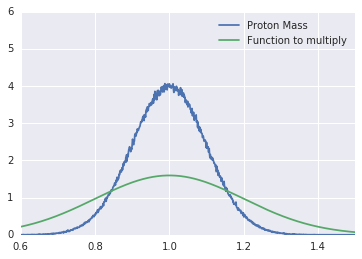

In [36]:
sigma = 0.1
mu = 1
bins = 10000

massmin=-5.
massmax=5.

x=np.arange(massmin,massmax,(massmax-massmin)/bins)
r = np.random.normal(mu,sigma,1000000)

incr_sigma=0.2
y=0.8/(incr_sigma*(2*np.pi)**0.5)    *  np.exp(-(x-mu)**2/(2*incr_sigma**2))

sigma_r = np.std(r)

pdf_r = histogram(r,bins=bins,normed=True,range=(massmin,massmax))

a = pdf_r[0]
a/=integr(x,a)
plt.plot(x,a,label='Proton Mass')
plt.plot(x,y,label='Function to multiply')
plt.legend()

plt.axis([0.6,1.5, 0, 6])


[0.6, 1.4, 0, 5]

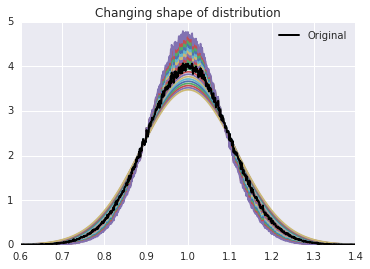

In [47]:

sigma = 0.1
mu = 1

#x=np.arange(massmin,massmax,(massmax-massmin)/bins)
#a=1/(sigma*(2*np.pi)**0.5)    *  np.exp(-(x-mu)**2/(2*sigma**2))

l = enlarge(a,10,x,sigma_r,0.15)
f = sharpen(a,10,x,sigma_r,0.15)
q = move(a,10,x,0.15)


for item in l:
    plt.plot(x,item)

for item in f:
    plt.plot(x,item)
    
plt.plot(x,a, linewidth=2.0, color = 'black', label='Original')
plt.title('Changing shape of distribution')
plt.grid(True)
plt.legend()

plt.axis([0.6,1.4, 0,5 ])



[0.6, 1.5, 0, 6]

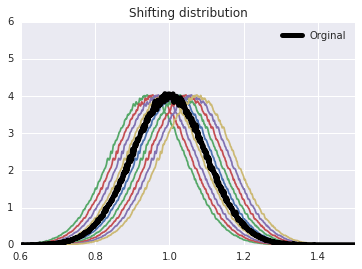

In [48]:
for item in q:
    plt.plot(x,item)
    
plt.plot(x,a, linewidth=5.0, color = 'black', label='Orginal')
plt.title('Shifting distribution')
plt.grid(True)
plt.legend()

plt.axis([0.6,1.5, 0, 6])
